In [39]:
import numpy as np
import xarray as xr
import netCDF4
import matplotlib.pyplot as plt
import dask.array as ar
import multiprocessing

num_cores = multiprocessing.cpu_count()

print(f"the number of cpu available is {num_cores}")

the number of cpu available is 8


In [40]:
data = netCDF4.Dataset('data.nc',chunks={'time':4})
print(data.dimensions)
print(data.variables.keys())

{'longitude': <class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 3600, 'latitude': <class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 1801, 'time': <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 24}
dict_keys(['longitude', 'latitude', 'time', 'd2m'])


In [41]:
lat = data.variables['latitude'][:]
lon = data.variables['longitude'][:]
d2m = data.variables['d2m'][:]
time = data.variables['time'][:]

print(f"the shape of the data is {d2m.shape}")



the shape of the data is (24, 1801, 3600)


ValueError: Width and height specified must be non-negative

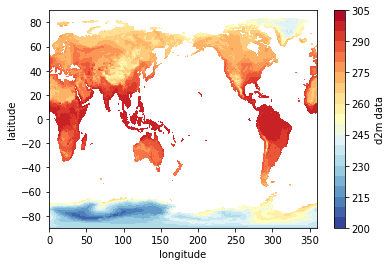

In [42]:
fig1 = plt.figure()
CS1 = plt.contourf(lon,lat,d2m[0,:,:],20,cmap='RdYlBu_r')
cbar = plt.colorbar(CS1)
cbar.set_label('d2m data')
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.axes([0,180,-80,80])

In [43]:
data2 = xr.open_dataset('data.nc',chunks={'time':4})
lat2 = data2['latitude']
lon2 = data2['longitude']
d2m2 = data2['d2m']

timerange = data2['time']
print(f"time range is {timerange}")

time range is <xarray.DataArray 'time' (time: 24)>
array(['2023-04-28T00:00:00.000000000', '2023-04-28T01:00:00.000000000',
       '2023-04-28T02:00:00.000000000', '2023-04-28T03:00:00.000000000',
       '2023-04-28T04:00:00.000000000', '2023-04-28T05:00:00.000000000',
       '2023-04-28T06:00:00.000000000', '2023-04-28T07:00:00.000000000',
       '2023-04-28T08:00:00.000000000', '2023-04-28T09:00:00.000000000',
       '2023-04-28T10:00:00.000000000', '2023-04-28T11:00:00.000000000',
       '2023-04-28T12:00:00.000000000', '2023-04-28T13:00:00.000000000',
       '2023-04-28T14:00:00.000000000', '2023-04-28T15:00:00.000000000',
       '2023-04-28T16:00:00.000000000', '2023-04-28T17:00:00.000000000',
       '2023-04-28T18:00:00.000000000', '2023-04-28T19:00:00.000000000',
       '2023-04-28T20:00:00.000000000', '2023-04-28T21:00:00.000000000',
       '2023-04-28T22:00:00.000000000', '2023-04-28T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime6

In [44]:
d2m2mean_temporal = d2m2.mean(dim='time')
d2m2mean_spatial = d2m2.mean(dim={'latitude','longitude'})
d2m2mean_temporal_local = d2m2.sel(latitude = slice(10),longitude = slice(10)).mean(dim='time')
d2m2min_spatial = d2m2.min(dim={'latitude','longitude'})
lat2_local = lat2.sel(latitude=slice(10))
lon2_local = lon2.sel(longitude=slice(10))


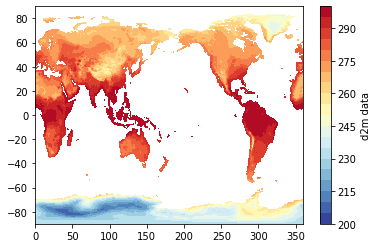

In [45]:
fig2 = plt.figure()
CS2 = plt.contourf(lon2,lat2,d2m2mean_temporal,20,cmap='RdYlBu_r')
cbar2 = plt.colorbar(CS2)
cbar2.set_label('d2m data')

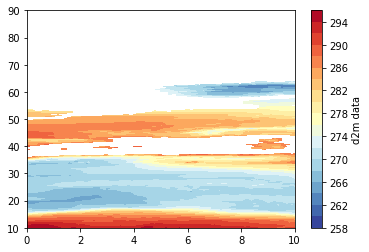

In [46]:
fig2b = plt.figure()
CS2b = plt.contourf(lon2_local,lat2_local,d2m2mean_temporal_local,20,cmap='RdYlBu_r')
cbar2b = plt.colorbar(CS2b)
cbar2b.set_label('d2m data')

<xarray.DataArray 'd2m' (time: 24)>
dask.array<_nanmin_skip-aggregate, shape=(24,), dtype=float32, chunksize=(4,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2023-04-28 ... 2023-04-28T23:00:00


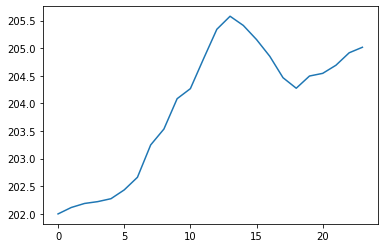

In [47]:
print(d2m2min_spatial)
fig2c = plt.figure()
plot2c = plt.plot(d2m2min_spatial)

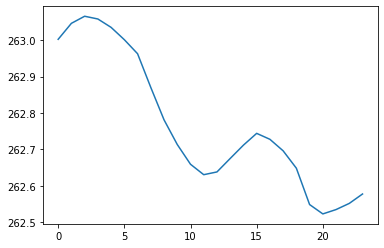

In [48]:
fig2 = plt.figure()
plt2 = plt.plot(d2m2mean_spatial)